# Part I: Define an RL Environment

## Part I - Step 1

### • Theme: Treasure hunt Grid World with diamonds as positive rewards and robber as negative rewards.

### • States: {S1 = (0,0), S2 = (0,1), S3 = (0,2), S4 = (0,3), S5 = (1,0), S6 = (1,1), S7 = (1,2), S8 = (1,3), S9 = (2,0), S10 = (2,1), S11 = (2,2), S12 = (2,3), S13 = (3,0), S14 = (3,1), S15 = (3,2), S16 = (3,3)}
    
### • Actions: {Up, Down, Right, Left}
### • Rewards: {-4, 0, +2, +6, +9}
### • Objective: Reach the goal state with maximum reward

## Part I - Step 2

In [1]:
import numpy as np
import gym
from gym import spaces

class Treasure_Hunt_Env(gym.Env):
    def __init__(self):

        self.grid_shape = (4, 4)
        self.n_states = np.prod(self.grid_shape)
        self.n_actions = 4

        self.action_space = spaces.Discrete(self.n_actions)
        self.observation_space = spaces.Discrete(self.n_states)

        self.rewards = {
            (0, 3): +2, (1, 3): +0, (2, 3): +0, (3, 3): +9,
            (0, 2): +0, (1, 2): -4, (2, 2): +0, (3, 2): -4,
            (0, 1): +0, (1, 1): +2, (2, 1): -4, (3, 1): +6,
            (0, 0): +0, (1, 0): +0, (2, 0): +0, (3, 0): +0
        }

        self.start_state = (0, 0)
        self.current_state = self.start_state
        self.goal_state = (3, 3)

    def step(self, action):
        x, y = self.current_state

        if action == 0:  # Up
            new_state = (x, min(y + 1, 3))
        elif action == 1:  # Down
            new_state = (x, max(y - 1, 0))
        elif action == 2:  # Right
            new_state = (min(x + 1, 3), y)
        elif action == 3:  # Left
            new_state = (max(x - 1, 0), y)

        self.current_state = new_state
        reward = self.rewards.get(new_state, 0)

        winner = False
        if new_state == self.goal_state:
            winner = True

        return self.observation_space.sample(), reward, winner, {}

    def reset(self):
        self.current_state = self.start_state
        return self.observation_space.sample()

    def render(self):
        visualizer = np.zeros(self.grid_shape)

        for state, reward in self.rewards.items():
            visualizer[state] = reward

        print(visualizer)


## Part I - Step 3

In [ ]:
env = Treasure_Hunt_Env()

# Ran the agent for 10 times
for basic_count in range(10):
    current_state = env.current_state
    # Randomly taken action
    random_action = env.action_space.sample()
    new_state, reward, winner, _ = env.step(random_action)

    # Output Visualization
    list_of_actions = ["0 (Up)", "1 (Down)", "2 (Right)", "3 (Left)"]
    print(f"Step No: {basic_count} \nCurrent State: {current_state}, Action: {list_of_actions[random_action]}, Reward: {reward}")
    env.render()
    print("------------------------------------------------------")


Step No: 0 
Current State: (0, 0), Action: 2 (Right), Reward: 0
[[ 0.  0.  0.  2.]
 [ 0.  2. -4.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  6. -4.  9.]]
------------------------------------------------------
Step No: 1 
Current State: (1, 0), Action: 1 (Down), Reward: 0
[[ 0.  0.  0.  2.]
 [ 0.  2. -4.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  6. -4.  9.]]
------------------------------------------------------
Step No: 2 
Current State: (1, 0), Action: 1 (Down), Reward: 0
[[ 0.  0.  0.  2.]
 [ 0.  2. -4.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  6. -4.  9.]]
------------------------------------------------------
Step No: 3 
Current State: (1, 0), Action: 1 (Down), Reward: 0
[[ 0.  0.  0.  2.]
 [ 0.  2. -4.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  6. -4.  9.]]
------------------------------------------------------
Step No: 4 
Current State: (1, 0), Action: 3 (Left), Reward: 0
[[ 0.  0.  0.  2.]
 [ 0.  2. -4.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  6. -4.  9.]]
------------------------------------------------------
Step No: 5 
Current Stat

## Part II - SARSA - Step 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SARSA_Agent:
    def __init__(self, env, alpha=0.2, gamma=0.99, epsilon=1.0, epsilon_decay=0.96, min_epsilon=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((env.n_states, env.n_actions))

    def choosing_action(self, state):
        if np.random.rand() < self.epsilon:
            # Exploration
            return self.env.action_space.sample()
        else:
            # Exploitation
            return np.argmax(self.q_table[state])

    def train(self, num_episodes):
        rewards_per_episode = []
        values_of_epsilon = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choosing_action(state)
            total_reward = 0

            while True:
                next_state, reward, winner, _ = self.env.step(action)
                next_action = self.choosing_action(next_state)

                self.q_table[state, action] = self.q_table[state, action] + self.alpha * (reward + self.gamma * self.q_table[next_state, next_action] - self.q_table[state, action])
                total_reward = total_reward + reward
                state = next_state
                action = next_action

                if winner:
                    break

            rewards_per_episode.append(total_reward)
            values_of_epsilon.append(self.epsilon)

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, values_of_epsilon

    def test(self, num_episodes):
        rewards_per_episode = []

        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0

            while True:
                action = np.argmax(self.q_table[state])  # Greedy action selection
                next_state, reward, winner, _ = self.env.step(action)

                total_reward += reward
                state = next_state

                if winner:
                    break

            rewards_per_episode.append(total_reward)

        return rewards_per_episode


In [ ]:
# Necessary functions for visualization

In [3]:
def do_visualize_1(rewards_per_episode, values_of_epsilon):
  plt.figure(figsize=(9, 4))
  plt.subplot(1, 2, 1)
  plt.plot(rewards_per_episode)
  plt.title('Total Reward / Episode')
  plt.xlabel('Number of Episodes')
  plt.ylabel('Total Reward / Episode')

  plt.subplot(1, 2, 2)
  plt.plot(values_of_epsilon)
  plt.title('Epsilon Decay')
  plt.xlabel('Number of Episodes')
  plt.ylabel('Value of Epsilon')

  plt.tight_layout()
  plt.show()

def do_visualize_2(test_rewards):
  plt.figure(figsize=(8, 6))
  plt.plot(test_rewards)
  plt.xlabel('Episode')
  plt.ylabel('Total Reward / Episode')
  plt.title('Greedy: Total Reward per Episode')
  plt.show()

## Part II - SARSA - Step 2

In [ ]:
#Base case

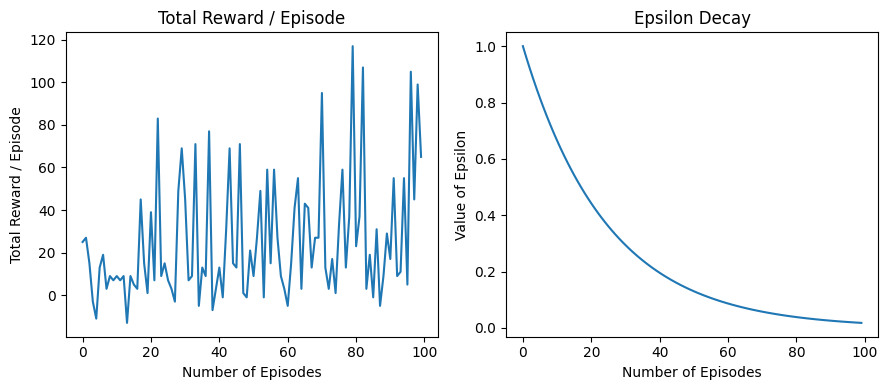

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[ 5.27920397  5.38294328 19.68958197  5.20626838]
 [ 0.64759092 17.00209183  2.4074954   5.78064481]
 [ 3.53234362  2.79443394 19.94707971  1.05864087]
 [22.12889598  5.50655739  5.35246158  1.00698659]
 [ 6.4416536   4.52085233 21.01999155  1.1911706 ]
 [ 1.03874103  2.83473973 18.3720079   2.55118115]
 [ 2.83447246  3.3846907  19.27470052  1.85451258]
 [ 2.75342049  2.61124147  5.4548898  16.94965392]
 [ 5.47623696 18.2928771   0.97050288  1.40497473]
 [ 0.44936735  0.9386692  21.76954708  3.55776115]
 [ 4.35502263 18.70584027  5.59155118  5.26548871]
 [ 4.83874776  0.02368808 17.03999285  4.19248782]
 [ 3.03768107 16.65615118 -0.3932704   3.33400969]
 [19.23032239  5.31916946  1.16490328  0.03

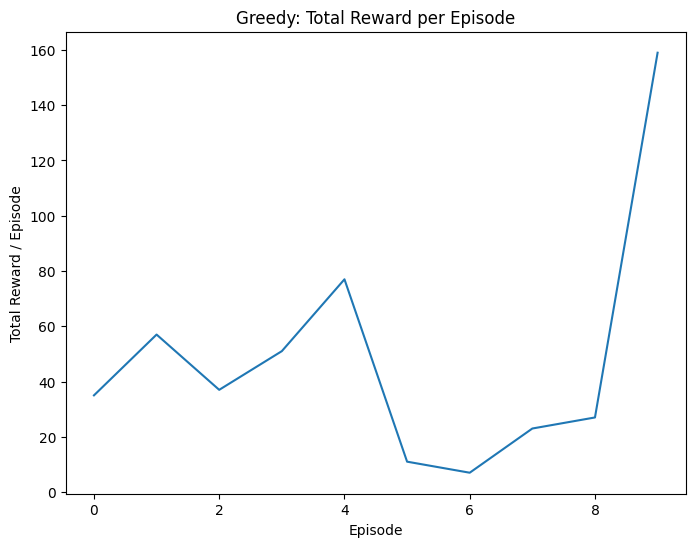

In [4]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay=0.96)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

## Part II - Step 3, 4

In [ ]:
# Hyperparameter Tuning -  case 1:

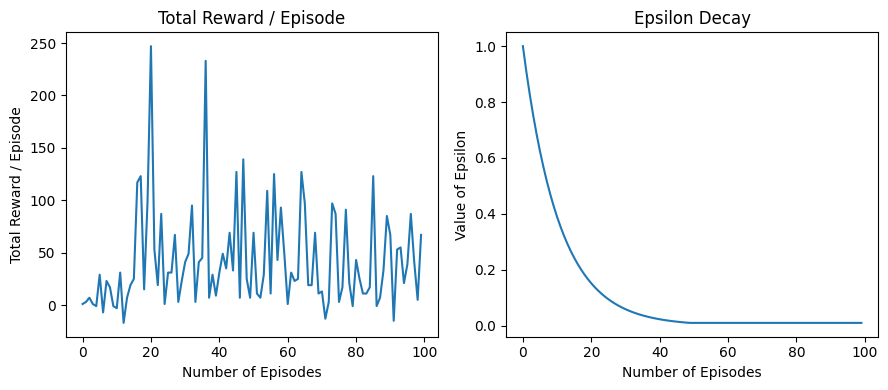

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[ 7.37256799 34.61350383 -1.3355898   2.60057666]
 [ 8.3363749   2.85307267  1.61458468 31.65006042]
 [33.44832128  0.04859923  1.62534004  2.71685848]
 [ 4.47876902  1.41113014 34.37585071  2.29855427]
 [ 3.27957906  7.7877343  32.28616984  3.57268437]
 [ 7.58350084  2.69847256 32.23996588 -0.48608591]
 [-0.5109997   0.0792     34.9886018   3.75014178]
 [-0.82582924  1.62006608 33.50274778  3.38297038]
 [-0.99282025  5.868143   36.50628433 -0.30928571]
 [ 3.55339234 33.28637157  2.05397059 -0.34734648]
 [ 7.6530452   5.28693807 36.28976454 -0.40633809]
 [ 2.21669591 32.7455662   2.74157426  5.88434657]
 [ 3.36303244  8.19883508 32.73928974  8.79802491]
 [30.80153282  4.68148295  8.59494876 10.00

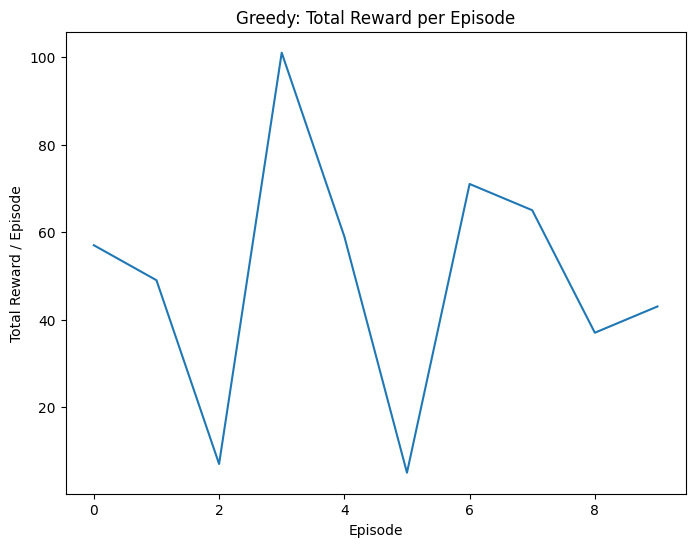

In [ ]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay=0.91)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

In [ ]:
# Hyperparameter Tuning -  case 2:

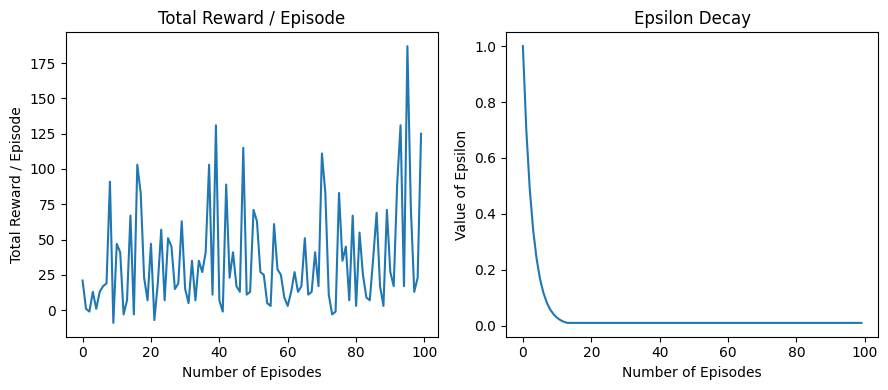

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[ 8.17583883e+00 -8.00000000e-01  2.82669202e+01 -6.69155045e-02]
 [ 2.79838516e+01  4.93369613e+00  5.06272657e-02  6.13563282e+00]
 [ 5.62539744e+00  2.41398861e+01  2.22610629e+00 -5.65565039e-01]
 [ 7.33452266e+00  1.74691180e-01  9.52135636e+00  2.91418380e+01]
 [ 7.24358289e+00 -6.13728276e-02  5.80480645e-01  2.95451488e+01]
 [ 1.46606217e+00 -9.83650314e-04  3.20791810e+00  2.87823940e+01]
 [-7.79504726e-01  2.16459601e+00  0.00000000e+00  2.85132009e+01]
 [ 7.85958574e-02  4.62805039e-01  2.62607742e+01 -3.13632000e-02]
 [ 3.09475963e+00  8.88201954e+00  2.95199809e+01  5.24970663e+00]
 [ 2.86230651e+01 -5.95520188e-01 -7.39267313e-01  4.86712321e+00]
 [ 5.24423602e+00  5.08295512e-01  5

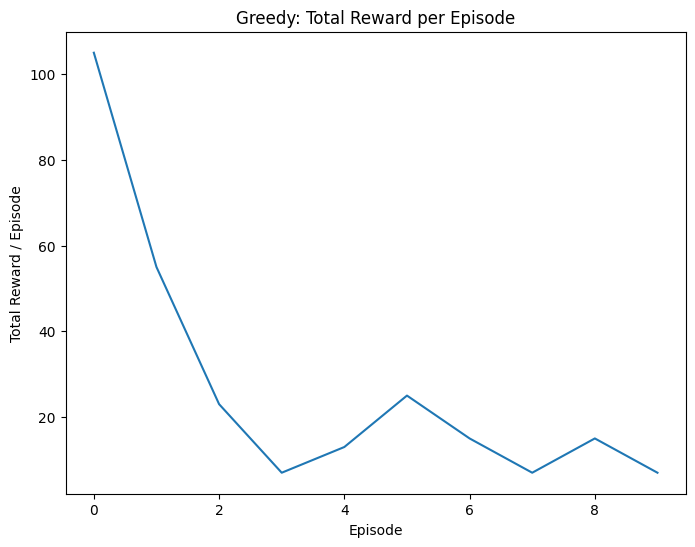

In [6]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay=0.7)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

In [ ]:
# Hyperparameter Tuning -  case 3:

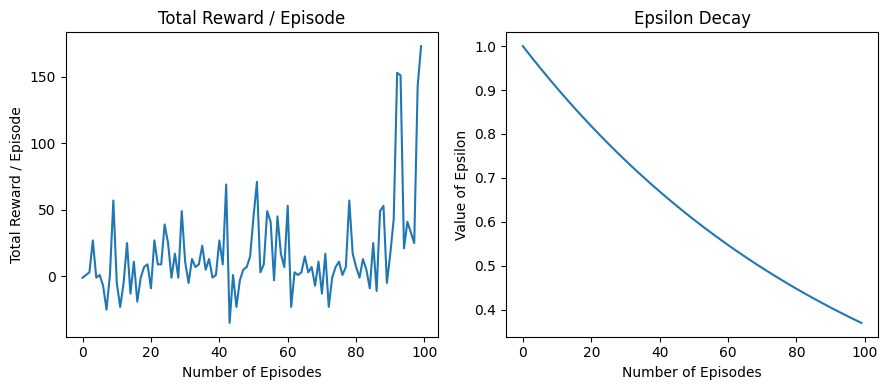

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[6.52053011 3.242086   2.93860076 5.01260095]
 [7.21832056 4.26935016 3.3960592  4.25251398]
 [7.5531493  4.73483605 3.20317593 4.9842384 ]
 [6.58010693 3.87002317 4.10658633 5.74362927]
 [6.38559007 2.20657661 5.20422043 4.07423218]
 [6.22192568 3.53891662 6.42093172 3.01655569]
 [5.94286118 3.23482356 7.52833132 7.14232085]
 [5.02044307 2.92327126 2.56193116 7.59888783]
 [7.30801885 3.89117227 3.16735346 5.32625573]
 [4.22349501 4.81415295 4.23212947 7.90414617]
 [6.49548467 2.33473679 4.92891069 4.52477013]
 [6.81557535 2.82949745 5.80880495 4.49630556]
 [8.46779499 3.83825328 4.01760054 6.90583118]
 [6.67826181 3.07635981 3.63070712 6.48857248]
 [4.5686235  3.83888686 4.79381645 5.89148331]
 

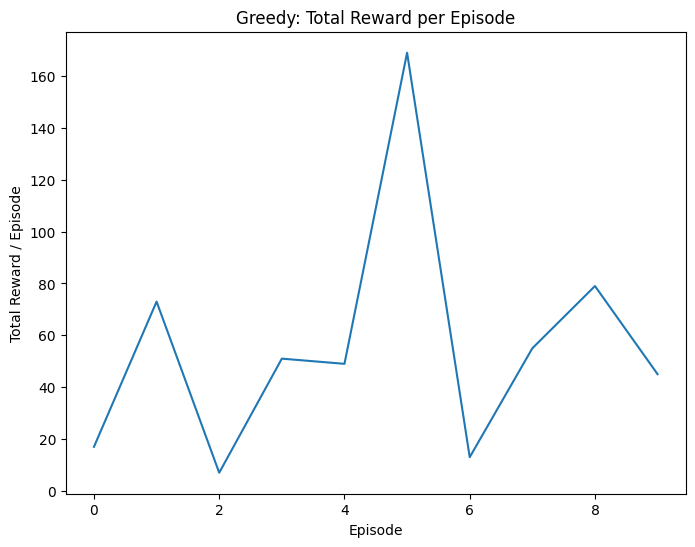

In [36]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay=0.99)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

In [ ]:
# Hyperparameter Tuning -  case 4:

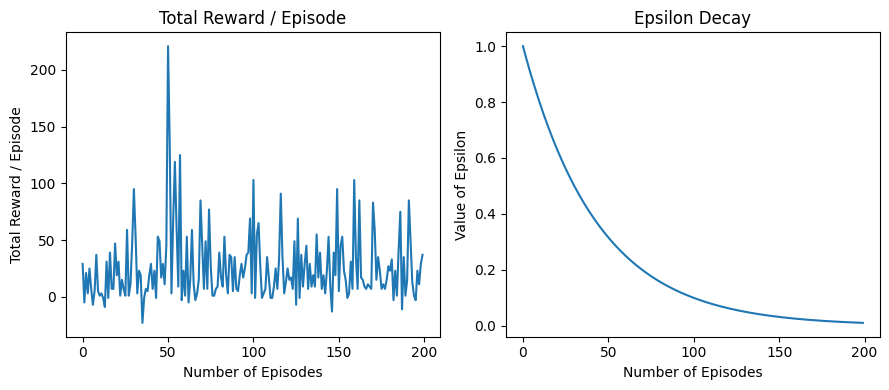

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[31.71113381  8.73346312  6.76251288 12.35387102]
 [ 9.95768769 11.44782461 28.15689307  4.37441253]
 [13.53361218  6.87190938 29.53730212  6.89981687]
 [10.91236291  5.58518398 28.31858035  6.72142538]
 [11.62657223 28.69458139  9.26273389  4.69508338]
 [ 8.63219546 13.46549883 27.70748495 10.07341532]
 [11.56452095  7.89157292 26.91964386  6.02588651]
 [ 9.52738194 29.31692393  7.35130723 10.03695759]
 [33.02918517  9.44942297  6.6479534   9.21358147]
 [28.18245294 10.64961577 10.54012789 12.22230418]
 [ 5.43889551 29.08485141  7.27163974  6.37224953]
 [ 9.00284727 27.80952787  5.20700361 11.3999116 ]
 [14.19407505  7.75417535 28.51111099 10.96132244]
 [30.01419563  7.19628373  5.8774449  10.95

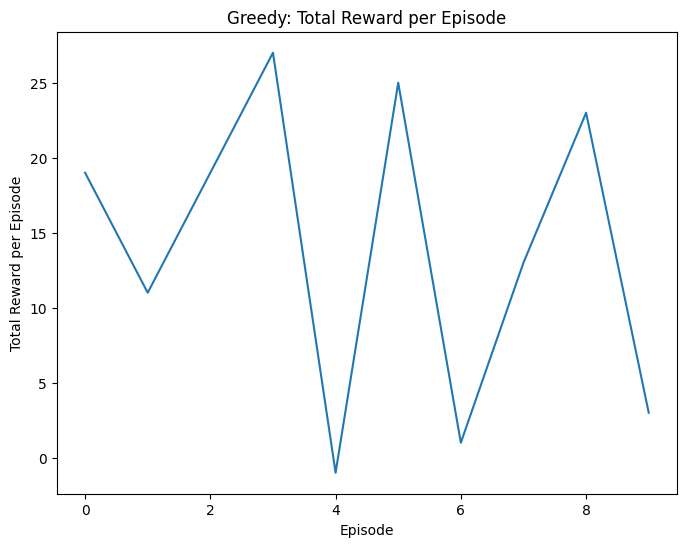

In [ ]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay= 0.9772)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(200)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

In [ ]:
# Hyperparameter Tuning -  case 5:

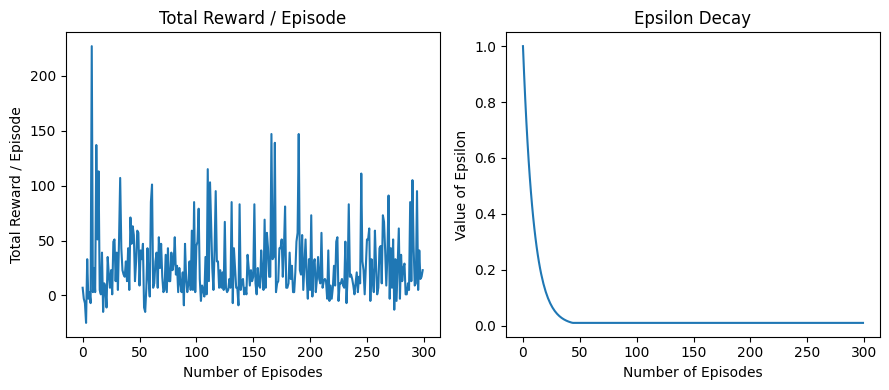

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[11.13197019 41.46863855  8.33569324  8.54427089]
 [19.04642422 43.28176645 18.97287442 20.05308039]
 [ 0.18359803 10.24487154 42.30708217 21.21939596]
 [ 0.16634225  8.35229355 41.74360699  4.28616457]
 [12.41534367  5.92819824 42.27766859 14.95309598]
 [17.51743677 15.8401733  42.08924508  8.97741308]
 [10.72324713  9.52478616 42.36691354  1.98494531]
 [42.17421811 19.43158756  6.36226565  4.91539041]
 [12.35986216  0.92563414  0.7709908  41.55318893]
 [44.77953975  7.48408661  0.70571126  1.75531907]
 [18.3928126  41.23790764 10.73546896  8.03636648]
 [16.83855714 42.87352373  8.9759126   0.6465914 ]
 [12.56477404  2.40708699 42.77867406 15.67241115]
 [45.37139235  6.56717506 13.67235749 -0.16

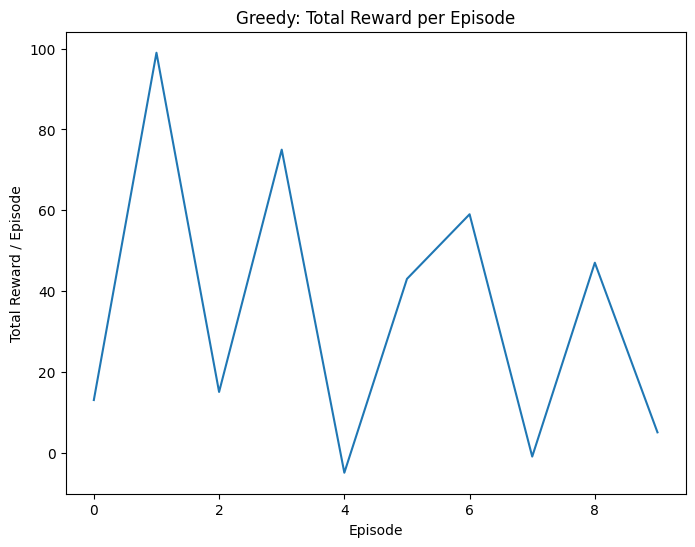

In [39]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay= 0.9)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(300)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

In [ ]:
# Hyperparameter Tuning -  case 6:

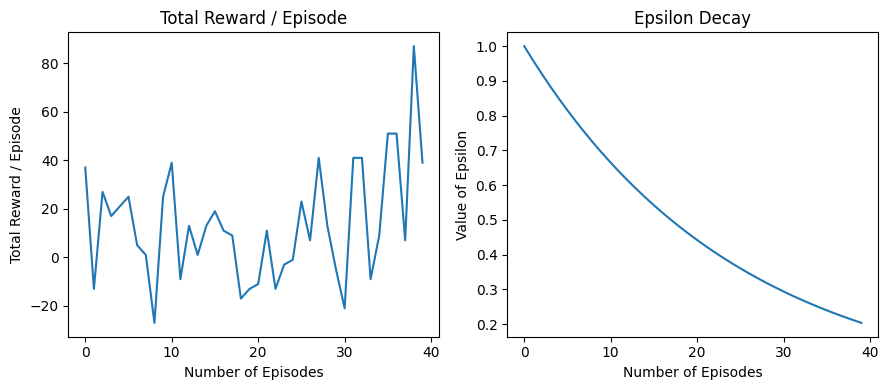

Q-table (At the beginning):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table (When trained):
[[ 0.32431204  0.96750558  5.13311793  0.02804539]
 [-0.91317283  0.75078227  3.89143685  0.34996394]
 [ 6.85932789  0.84787424 -0.0761609   1.50774247]
 [ 0.84890867  1.86992546  4.6599898   1.62916877]
 [ 3.11003297  1.21716668 -0.06339977 -0.61904287]
 [ 1.21960479  1.41817566  4.23458933  1.15026049]
 [ 5.80360571  0.18033199  1.25109717  0.23488892]
 [ 0.52898772  3.39420487  0.04643567  1.03688485]
 [ 3.12359641  0.61382678  3.97677512  0.90786381]
 [-0.16546808  2.09211466  1.89645299 -0.08864003]
 [ 6.16914882  0.99697475  2.34166763  1.1196509 ]
 [-0.8968097   0.99548583  4.25723193  0.96574817]
 [ 0.56126563  2.64476853  4.75308929  1.08976617]
 [ 1.50488908  0.99368138  3.39213496  0.64

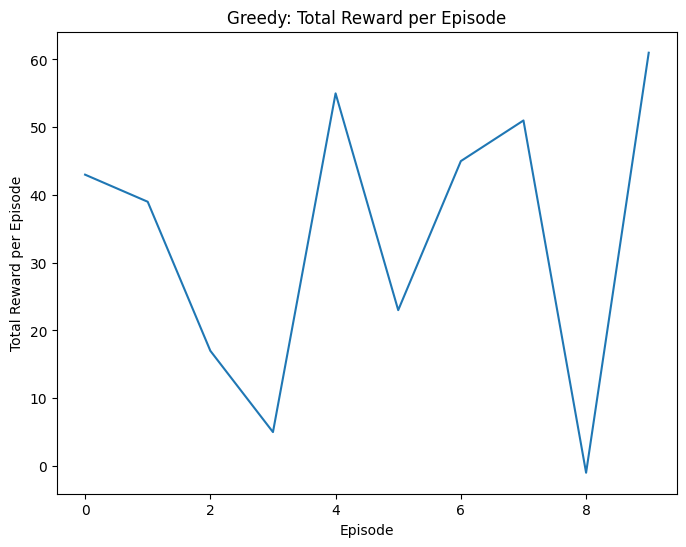

In [ ]:
env = Treasure_Hunt_Env()

agent_for_sarsa = SARSA_Agent(env, epsilon_decay= 0.96)
rewards_per_episode, values_of_epsilon = agent_for_sarsa.train(40)

do_visualize_1(rewards_per_episode, values_of_epsilon)

# Tables
print("Q-table (At the beginning):")
print(np.zeros((env.n_states, env.n_actions)))
print("\nQ-table (When trained):")
print(agent_for_sarsa.q_table)

# Greedy
test_rewards = agent_for_sarsa.test(10)
do_visualize_2(test_rewards)

## Part III - Double Q-learning - Step 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Double_Q_Learn:
    def __init__(self, env, alpha=0.2, gamma=0.99, epsilon=1.0, epsilon_decay=0.96, min_epsilon=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table_A = np.zeros((env.n_states, env.n_actions))
        self.q_table_B = np.zeros((env.n_states, env.n_actions))

    def choosing_action(self, state):
        if np.random.rand() < self.epsilon:
            # Exploration
            return self.env.action_space.sample()
        else:
            # Exploitation
            return np.argmax(self.q_table_A[state] + self.q_table_B[state])

    def train(self, num_episodes):
        rewards_per_episode = []
        values_of_epsilon = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choosing_action(state)
            total_reward = 0

            while True:
                next_state, reward, winner, _ = self.env.step(action)
                next_action = self.choosing_action(next_state)

                if np.random.rand() < 0.5:
                    # Updating Q_table_A
                    self.q_table_A[state, action] = (1 - self.alpha) * self.q_table_A[state, action] + self.alpha * (reward + self.gamma * self.q_table_B[next_state, np.argmax(self.q_table_A[next_state])])
                else:
                    # Updating Q_table_B
                    self.q_table_B[state, action] = (1 - self.alpha) * self.q_table_B[state, action] + self.alpha * (reward + self.gamma * self.q_table_A[next_state, np.argmax(self.q_table_B[next_state])])

                total_reward = reward + total_reward
                action = next_action
                state = next_state

                if winner:
                    break

            rewards_per_episode.append(total_reward)
            values_of_epsilon.append(self.epsilon)

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, values_of_epsilon

    def test(self, num_episodes):
        rewards_per_episode = []

        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0

            while True:
                action = np.argmax(self.q_table_A[state] + self.q_table_B[state])
                next_state, reward, winner, _ = self.env.step(action)

                total_reward += reward
                state = next_state

                if winner:
                    break

            rewards_per_episode.append(total_reward)

        return rewards_per_episode


## Part III - Double Q-learning - Step 2

In [ ]:
# Base case

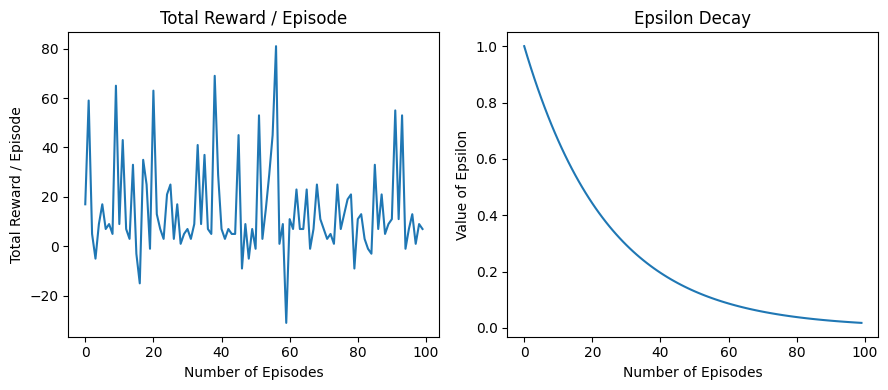

<Figure size 640x480 with 0 Axes>

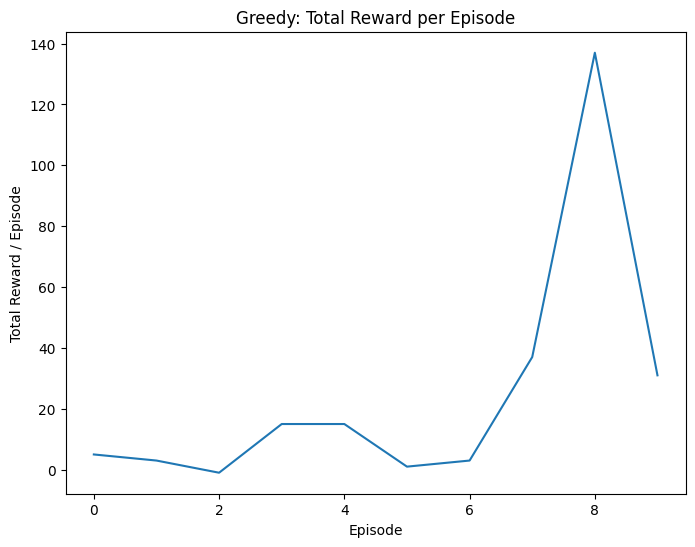

Q-table_A: At the beginning
[[ 3.25047547 -0.04829744  9.73905311 -0.27697564]
 [ 0.63366168  1.32282026  6.75547938  1.00744253]
 [ 5.76149372  0.70057792 -0.21346282 -1.21708675]
 [ 4.70878551  0.82741253  8.64116273  0.12956145]
 [ 8.8415471   1.65018963  1.71065277  1.60311772]
 [ 1.50278803  0.58814607  5.65747343  0.22369919]
 [ 1.37009926  7.25790014  1.07362248  1.68512949]
 [11.69976926  2.26221911  1.21316504  0.        ]
 [ 8.33297802  1.90067297  3.12772411 -0.23778855]
 [ 0.38027795  7.36904155  1.16087189 -0.60738986]
 [ 7.51502351  0.48333874 -0.08892875 -0.77303287]
 [-0.50207871  8.00716577  2.46139737 -0.23386392]
 [-0.18023859  1.89093047  7.5408287   0.04555154]
 [ 7.50784326  3.23908948 -0.60916421  0.59577615]
 [-0.84500015  0.40880916  9.69365664  0.88265455]
 [ 1.07750545  0.9788236   7.08150837  1.06648928]]

Q-table_B: At the beginning
[[-4.73747190e-02  7.33522978e-01  7.59571094e+00 -2.20377414e-03]
 [-7.09947801e-01  1.73798859e-01  7.04049438e+00  1.215111

In [32]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


## Part III - Double Q-learning - Step 3 and 4

In [ ]:
# Hyperparameter Tuning -  case 1:

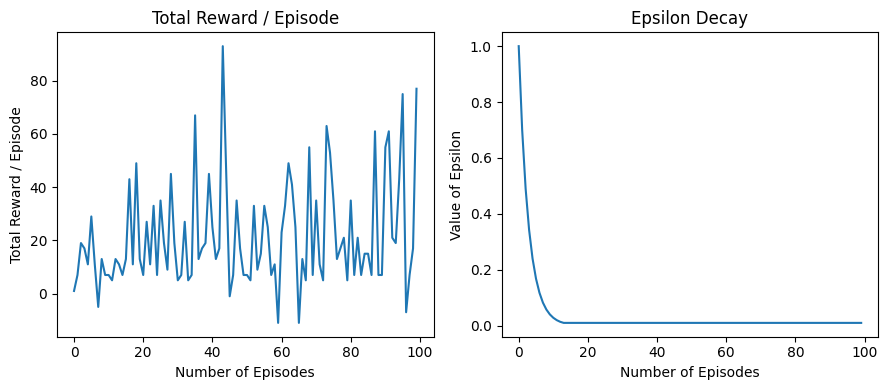

<Figure size 640x480 with 0 Axes>

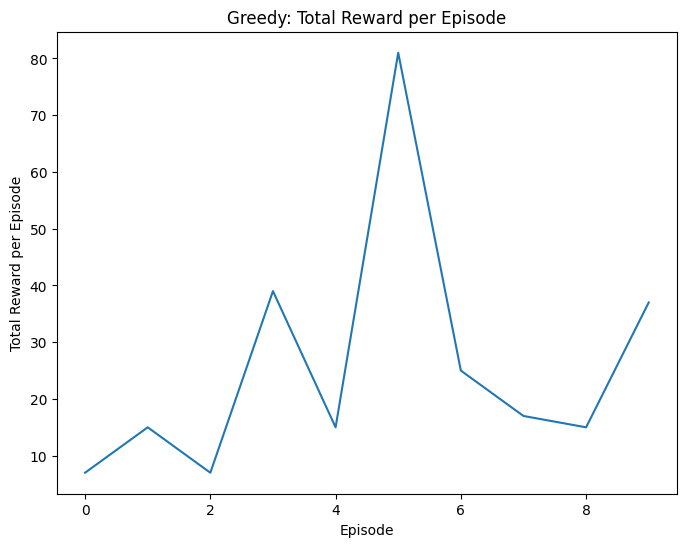

Q-table_A: At the beginning
[[12.28315431  1.54841889  2.84844744  0.        ]
 [12.3593447   0.          1.67935834  0.        ]
 [ 1.1104325   0.         12.59717496  0.        ]
 [12.43314831  0.         -0.34648251  0.        ]
 [-0.749312   -0.63477802  1.386469   12.80251449]
 [ 0.61499341  0.         11.27877821  2.60887761]
 [12.38623469 -0.05505775 -1.44        0.        ]
 [11.84366152  0.04982397  0.          0.03991217]
 [ 0.          0.27340971  0.         12.76115142]
 [ 0.         -0.8        13.07662463  0.27834829]
 [-0.12672     0.         12.15719904  1.12907073]
 [-0.5313536   1.59162724 -0.12165171 12.28972994]
 [12.76163674  0.          0.          0.        ]
 [12.72253523  0.          0.          0.        ]
 [12.50690751  0.1426187   0.          0.        ]
 [12.14612383  0.          0.          0.        ]]

Q-table_B: At the beginning
[[11.96970559  0.          0.          0.        ]
 [12.15547777  0.          0.          0.        ]
 [ 0.          1.8863029

In [ ]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.7)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


In [ ]:
# Hyperparameter Tuning -  case 2:

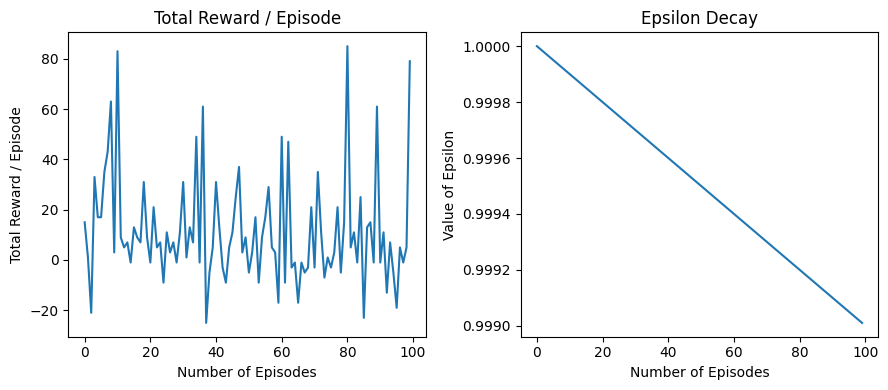

<Figure size 640x480 with 0 Axes>

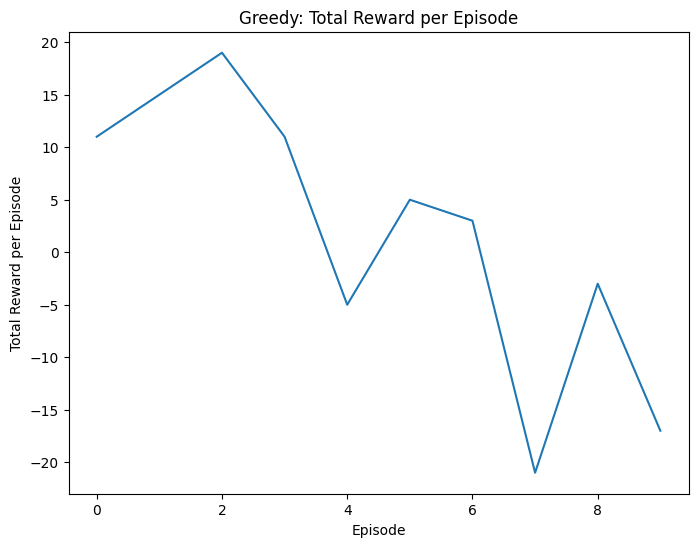

Q-table_A: At the beginning
[[4.36554651 3.80016425 6.61271212 3.4630905 ]
 [1.86535797 3.05478033 4.1837618  3.52111713]
 [5.60596221 4.70406323 4.53652085 2.26772096]
 [3.84771585 5.15751032 4.22381302 3.75173294]
 [2.65645325 3.79413526 3.34199086 2.08039263]
 [5.25356206 3.53541881 4.1936082  3.01003366]
 [3.53513312 3.68677558 2.76411391 3.01795592]
 [2.90089    3.52147336 2.75434179 2.31067446]
 [3.62845656 3.97987182 4.18534096 4.30489956]
 [2.96928239 2.7024201  3.20716718 3.6245496 ]
 [2.67393246 3.57715864 2.18695528 3.67929486]
 [2.79277973 2.67665175 2.37757248 4.56640078]
 [2.90000383 3.29870959 4.16608544 3.5768837 ]
 [2.9583578  3.69294003 4.39385437 2.87287525]
 [2.92444159 3.85114952 2.66377308 3.63656111]
 [4.7720696  3.97882419 4.40329114 3.94266104]]

Q-table_B: At the beginning
[[2.76583131 2.93797262 3.75407373 3.19470045]
 [3.13129959 3.47016592 5.39714582 3.36092247]
 [3.34868204 2.75249335 2.9168913  2.77089766]
 [3.84549758 4.30766335 3.91851824 4.04283125]
 [

In [ ]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.99999)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


In [ ]:
# Hyperparameter Tuning -  case 3:

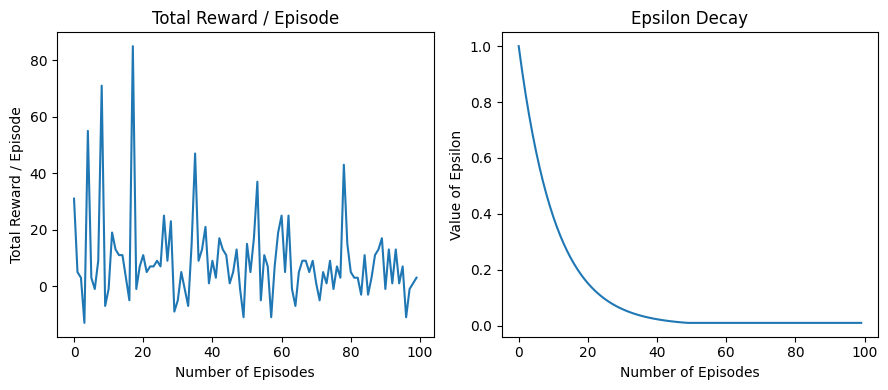

<Figure size 640x480 with 0 Axes>

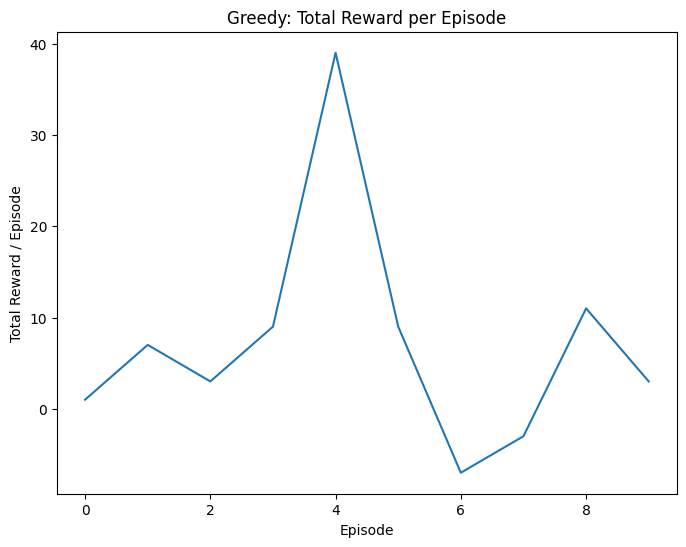

Q-table_A: At the beginning
[[ 2.87354471  0.68362361 -0.1897632   0.552064  ]
 [ 4.52430552  1.2         0.97834193  0.        ]
 [-0.94914075  4.44085044 -0.674586   -0.32891106]
 [ 0.67963915  3.26061105 -0.69789389 -0.43773762]
 [ 3.60959798 -0.12672     0.3686368  -0.36672   ]
 [ 5.2675399   0.06346052 -0.75787085 -1.20850144]
 [ 5.08776358 -0.21485376  0.18505126  0.92953748]
 [-0.44491113 -0.20884465  2.37051186  0.78469199]
 [ 0.          0.          3.39107395 -1.04990087]
 [ 2.77510709  1.02836887  0.16306787 -0.1584    ]
 [ 0.          3.89413513  0.03440174  0.11260137]
 [-0.8313632   4.01368824 -0.43305993  0.        ]
 [ 5.14960913  0.29853214  0.38789223 -1.3277076 ]
 [ 3.74110267  0.         -0.30002842  0.22410987]
 [-0.45442333  3.74287013  0.35191959  0.        ]
 [-1.49171508  0.07596121  6.41774352  0.        ]]

Q-table_B: At the beginning
[[ 2.79852382e+00  2.95192417e-01 -3.52452063e-01  2.48396544e-03]
 [ 3.89271420e+00  1.62083558e+00  4.11150953e-01  0.000000

In [35]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.91)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(100)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


In [ ]:
# Hyperparameter Tuning -  case 4:

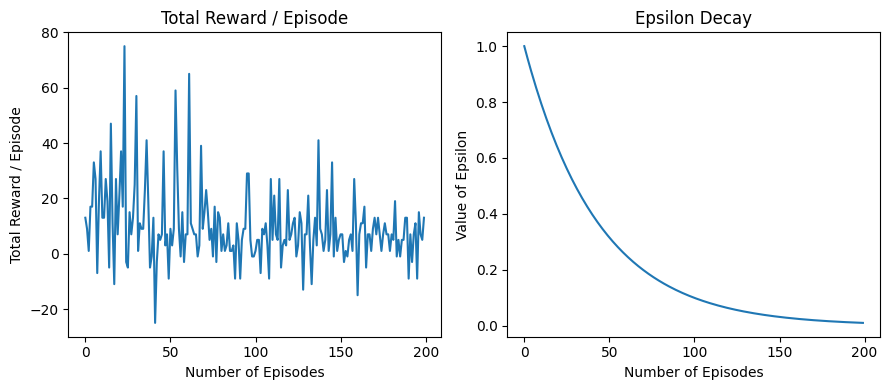

<Figure size 640x480 with 0 Axes>

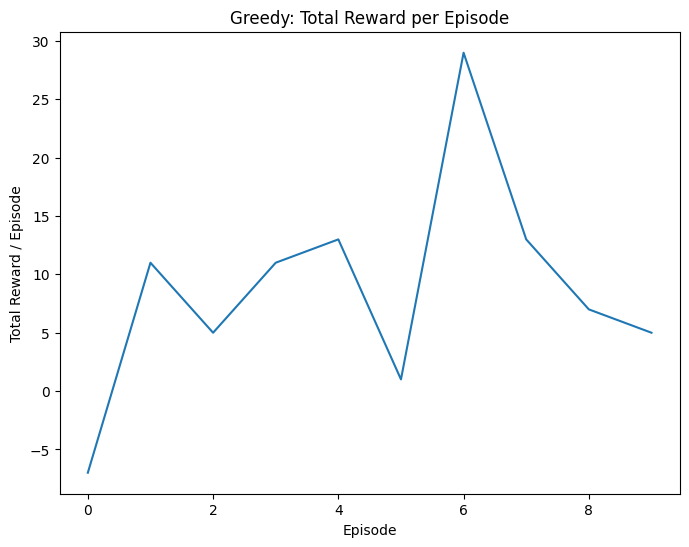

Q-table_A: At the beginning
[[ 2.46556145  1.42920635  0.80526705  2.62187682]
 [ 2.8556319   1.08350298  4.48842829  0.56766095]
 [ 4.67727066  1.87811925  2.68701756  0.75106385]
 [ 1.4155508   1.29898968  4.57705047  0.4340265 ]
 [ 4.37021807  1.16667821 -1.53605687  0.89619517]
 [ 2.80912738  0.29127929  6.32887769  1.65784268]
 [-0.68045808  0.10937338  7.15438516  0.43570224]
 [ 5.34135008  1.18634825  1.99642793  0.75496262]
 [ 3.58028975 -0.43532533  3.23433838  0.31620522]
 [ 2.51611328  1.0364588   0.20286503 -0.5263279 ]
 [ 4.03211994  2.66139302  2.33929146  1.10762524]
 [ 0.01472034 -0.85546052  3.57218816  1.13519601]
 [ 2.1188192   4.18457784  1.21889422  1.07539037]
 [ 1.65074594  1.51817134  4.36923558  0.10178767]
 [ 4.55549796  2.99400106  1.68947745  0.70875995]
 [ 4.20461114  2.11581661 -0.28406041  0.48954567]]

Q-table_B: At the beginning
[[ 0.63586771  2.5260815   0.2884143   3.72785224]
 [ 3.78072527 -1.09591285  7.37879951  1.72028091]
 [ 3.40321071  0.2036723

In [11]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay = 0.9772)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(200)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


In [ ]:
# Hyperparameter Tuning -  case 5:

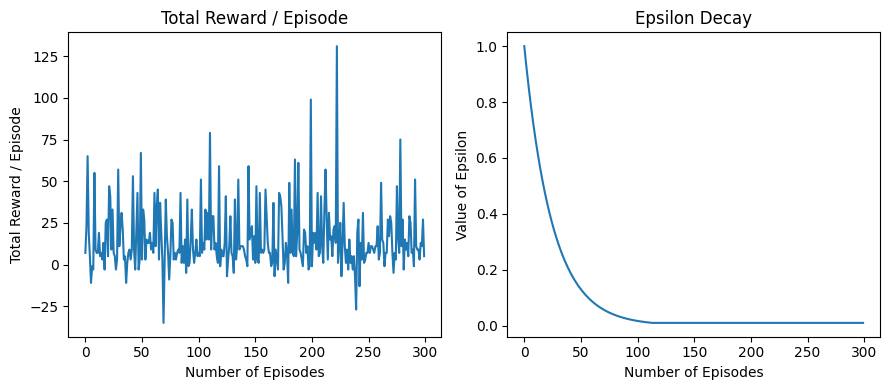

<Figure size 640x480 with 0 Axes>

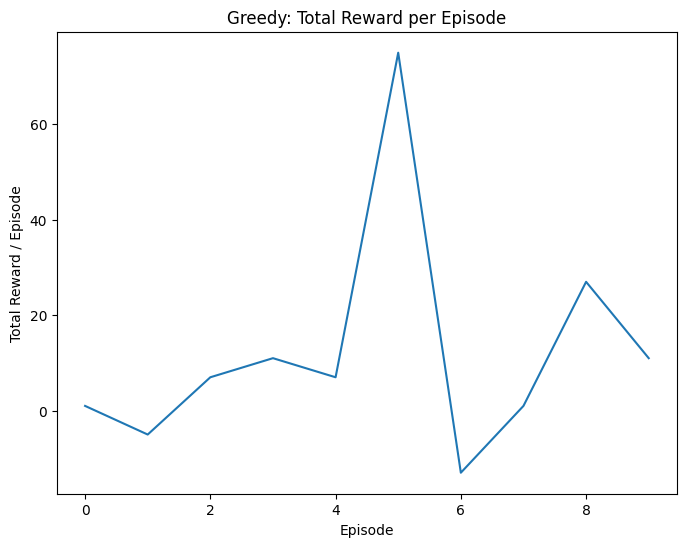

Q-table_A: At the beginning
[[ 2.37403482e+01 -3.43253854e-01  4.46029039e-01  1.92070475e+00]
 [ 4.65384867e-01  7.36041192e+00  2.23697815e+01  2.85232175e-01]
 [ 1.81742353e+00 -8.61542185e-02  2.21963820e+01  2.02727599e-02]
 [ 2.22027823e+01  1.40392428e-01  6.75540232e-01 -3.83484844e-01]
 [ 1.41233053e+00  2.26937790e+01  3.99534457e-02  7.82866433e-01]
 [ 2.17972880e+01 -4.74753740e-01 -4.10861537e-01  7.08906680e-01]
 [-5.66337908e-01  7.42687670e-01  2.12329619e+01 -7.82993990e-02]
 [ 1.55507755e+00  1.76618927e+00  2.19127581e+01  7.52527356e-01]
 [-2.37509346e+00  2.37952168e+01 -5.59406351e-01  7.93430423e-01]
 [ 3.75624537e+00 -6.34597555e-01  2.50531852e+01  3.18521063e+00]
 [ 4.69221965e-01  2.25166494e+01  2.07114387e+00  6.38709775e-01]
 [ 2.26864463e+01  2.28787183e-01 -1.28691343e+00 -9.20537456e-01]
 [ 2.54666865e+01  2.85247994e-01  5.60030441e+00  2.36807459e+00]
 [ 1.70513950e+00 -3.81277170e-02  2.05136084e+01  8.92841489e-01]
 [ 3.85461958e-01  2.29426740e+01 

In [27]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.96)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(300)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


In [ ]:
# Hyperparameter Tuning -  case 6:

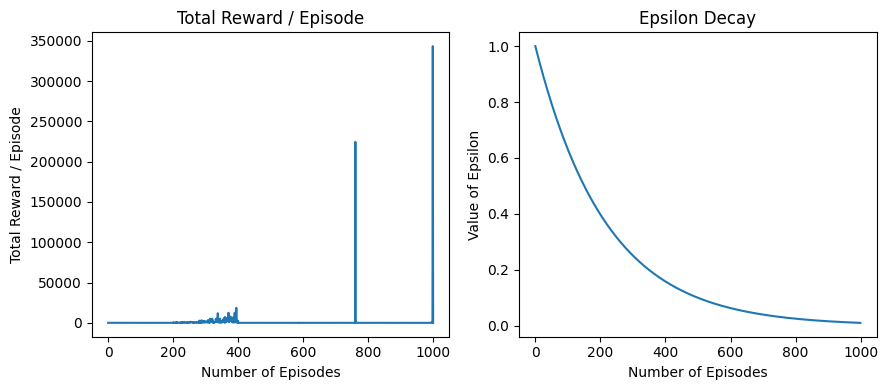

<Figure size 640x480 with 0 Axes>

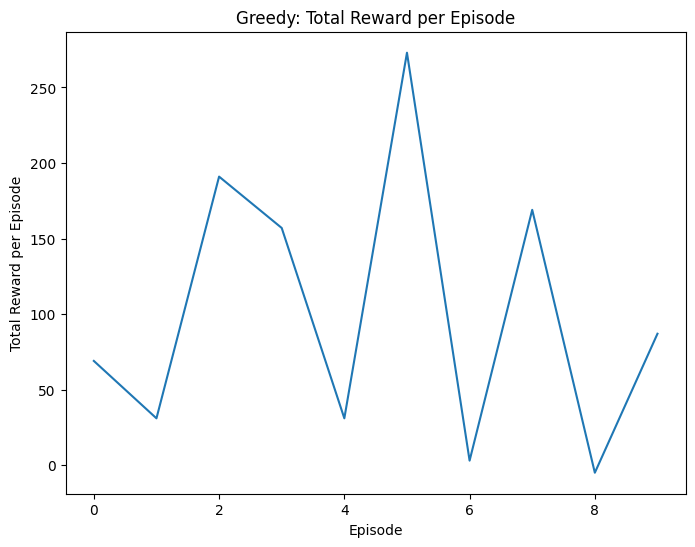

Q-table_A: At the beginning
[[193.89598465 188.96382132 191.39926035 195.52431082]
 [195.50106446 193.59166926 190.95432416 195.43182628]
 [195.26666098 191.35660023 195.47394796 193.49638517]
 [192.25098617 194.13867741 191.5526877  194.4175862 ]
 [193.4997827  190.65158812 196.11977151 195.19395833]
 [192.72879083 192.16339658 191.21883106 194.83364753]
 [192.22608375 189.2487419  190.71652824 193.12461767]
 [195.20357527 183.11015589 191.79365279 189.60567352]
 [193.27806199 181.89440012 190.47840154 186.29355394]
 [194.1841539  192.39095602 191.1256664  194.57120601]
 [198.3960178  195.31536908 194.38977271 194.49487746]
 [187.84790509 192.32317214 194.20383398 194.24714021]
 [179.89110708 192.84526926 187.14641731 194.00496923]
 [190.16531543 194.68164041 192.45369657 194.83510984]
 [194.96964843 194.70112982 195.69836919 194.90527555]
 [192.64508396 194.5567609  193.23978427 194.78560614]]

Q-table_B: At the beginning
[[196.23563009 188.17334717 192.94480761 194.61919173]
 [193.4

In [ ]:
env = Treasure_Hunt_Env()
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.9954)

rewards_per_episode, values_of_epsilon = agent_for_double_q.train(1000)

do_visualize_1(rewards_per_episode, values_of_epsilon)

plt.tight_layout()
plt.show()

test_rewards = agent_for_double_q.test(10)

do_visualize_2(test_rewards)

print("Q-table_A: At the beginning")
print(agent_for_double_q.q_table_A)

print("\nQ-table_B: At the beginning")
print(agent_for_double_q.q_table_B)

print("\nTrained Q-table_A:")
print(agent_for_double_q.q_table_A)

print("\nTrained Q-table_B:")
print(agent_for_double_q.q_table_B)


## Comparison for Report

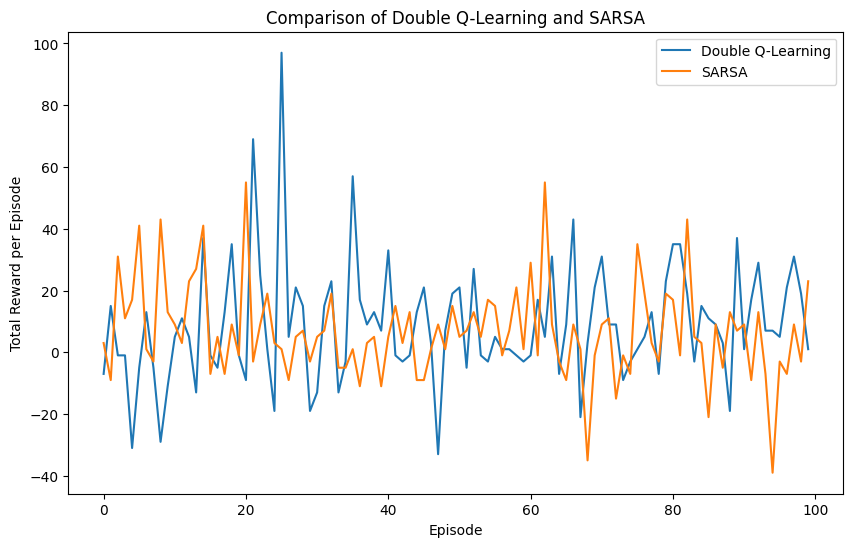

In [10]:
env = Treasure_Hunt_Env()

# Create instances of both agents
agent_for_double_q = Double_Q_Learn(env, epsilon_decay=0.995)
agent_for_sarsa = SARSA_Agent(env, epsilon_decay=0.995)

# Train both agents
rewards_per_episode_double_q, ignore = agent_for_double_q.train(100)
rewards_per_episode_sarsa, ignore = agent_for_sarsa.train(100)

# Plot the reward dynamics for both algorithms
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode_double_q, label='Double Q-Learning')
plt.plot(rewards_per_episode_sarsa, label='SARSA')
plt.title('Comparison of Double Q-Learning and SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.legend()
plt.show()